In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s).

First variable: About how often do you pray? (PRAY)

1) Several times a day

2) Once a day

3) Several times a week

4) Once a week

5) Less than once a week

6) Never

8) Don't know

9) No answer

In [ ]:
# See what the actual data is
# There are no 8 and 9 options
d.pray.value_counts()

1.0    926
2.0    863
5.0    342
3.0    332
6.0    316
4.0    192
Name: pray, dtype: int64

In [ ]:
# Learn more about the variable
# The 50% value shows that at least half of the respondents have prayed once a day
d.pray.describe()

count    2971.000000
mean        2.700101
std         1.711890
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: pray, dtype: float64

In [ ]:
# Recode the variable to be binary based on 1-6 options
# 1-4 options represent often (1), 5-6 options represent not often (0)
conditions = [
    (d['pray'] < 5) ,
    (d['pray'] > 4)]
choices = [1,0]
d['pray_new'] = np.select(conditions, choices, default=np.nan)

In [ ]:
# Create a crosstab to check if the variable is successfully recoded
res = pd.crosstab(d.pray, d.pray_new)
res.astype('float').div(res.sum(axis=0), axis=1)

pray_new,0.0,1.0
pray,,
1.0,0.000000,0.400346
2.0,0.000000,0.373109
3.0,0.000000,0.143537
4.0,0.000000,0.083009
5.0,0.519757,0.000000
6.0,0.480243,0.000000


Second variable: How many (family) attend religious services on a regular basis? (ACQFMGO)

1) 0

2) 1

3) 2-5

4) 6-10

5) More than 10

8) Don't know

9) No answer

In [ ]:
# Learn about the variable
# The 50% value shows that at least half of the respondents have had more than 6 families attending religious services regularly
# There are no 8 and 9 options
d.acqfmgo.describe()

count    477.000000
mean       3.815514
std        1.265048
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: acqfmgo, dtype: float64

array([[<Axes: title={'center': 'acqfmgo'}>]], dtype=object)

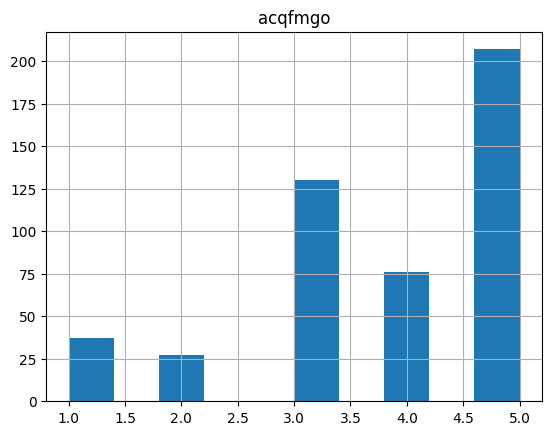

In [ ]:
# Visualize the distribution of the variable
d.hist(column='acqfmgo')

In [ ]:
# Recode the variable to be binary based on 1-5 options
# 1-3 options represent few (0) and 4-5 options represent many (1)
conditions = [
    (d['acqfmgo'] < 4) ,
    (d['acqfmgo'] > 3)]
choices = [0,1]
d['acqfmgo_new'] = np.select(conditions, choices, default=np.nan)

In [ ]:
# Create a crosstab to check if the variable is successfully recoded
res = pd.crosstab(d.acqfmgo, d.acqfmgo_new)
res.astype('float').div(res.sum(axis=0), axis=1)

acqfmgo_new,0.0,1.0
acqfmgo,,
1.0,0.190722,0.000000
2.0,0.139175,0.000000
3.0,0.670103,0.000000
4.0,0.000000,0.268551
5.0,0.000000,0.731449


#### 2. Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.

In [ ]:
res = pd.crosstab(d['pray_new'], d['acqfmgo_new'], normalize='columns')
res

acqfmgo_new,0.0,1.0
pray_new,,
0.0,0.333333,0.169611
1.0,0.666667,0.830389


Through the crosstab, we can see that for respondents who had fewer families attending regular religious services, there were 67% of them prayed frequently; for those who had more families attending regular religious services, there were 83% of them prayed frequently. Although there were always more people frequently praying in both conditions, the higher percentage of 83% shows that there is a positive correlation between the frequency of praying and the number of families participating in regular religious services.

#### 3. Run a linear regression with 1 independent and 1 dependent variable; make all of the recodes necessary to make the model as easy to interpret as possible; and explain your results.

In [ ]:
# I use my recoded variables above to run the linear regression
# Since they are recoded to be binary, the model should be easier to interpret
lm = smf.ols(formula = 'pray_new~acqfmgo_new', data = d).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:               pray_new   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.57
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.30e-05
Time:                        04:12:58   Log-Likelihood:                -258.32
No. Observations:                 475   AIC:                             520.6
Df Residuals:                     473   BIC:                             529.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6667      0.030     22.115      

From the above results, we can notice that an increase of one unit in "acqfmgo_new" is associated with an increase of 0.1637 units in "pray_new“, which implies that as the number of families attending regular religious services increases, the frequency of praying tends to increase, but the relationship is not very strong. The p-value is less than 0.001, so the relationship is highly statistically significant and is not likely due to random chance. And the r-squared is 0.036, so the model can only explain 3.6% of the variability in "pray_new".

#### 4. Plot two variables, either as a scatter plot or boxplot; add in trend/regression lines; and explain your results.

<Axes: xlabel='educ', ylabel='tvhours'>

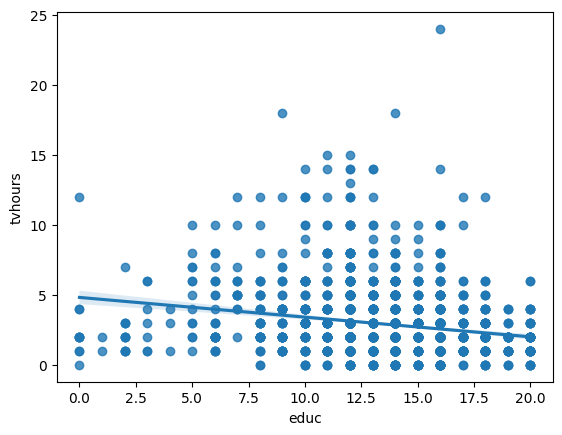

In [ ]:
sns.regplot(x=d['educ'],y=d['tvhours'])

Here I choose two other variables: one is the average number of hours respondents spent watching television every day, and the other is their educational level. Through the plot, we can see that respondents who watched TV the longest had an education level of around 11 years, but through the trend line, we can notice that as educational levels go up, TV hours slightly decline, which shows that there is a small negative correlation between TV hours and educational levels.